 <img src="SIFTS.png" style="width:500px"> 

# Mapping Pharos Receptors to PDB with SIFTS

The Structure Integration with Function, Taxonomy and Sequence (SIFTS) database provides mappings between UniProt and  PDB, as well as annotations from IntEnz, GO, InterPro, Pfam, CATH, SCOP, PubMed, Ensembl and Homologene resources.

Here, we map all the IDG receptors from the Pharos database to their PDB IDs, using their UniProt accession numbers.

In [1]:
import pandas as pd

Read Pharos data for receptor classes, containing UniProt ids for each receptor.

In [2]:
target_classes = ["GPCRs", "ion-channels", "kinases", "nuclear-receptors", "transporters"]
IDG_data = {}

In [3]:
for tclass in target_classes:
    IDG_data[tclass] = pd.read_csv("data/" + tclass + ".csv", index_col=False)

Read SIFTS Uniprot to PDB mappings.

In [4]:
uniprot_to_pdb = pd.read_csv("data/uniprot_pdb.csv", skiprows=1)

In [5]:
uniprot_to_pdb.head()

,SP_PRIMARY,PDB
0,A0A010,5b00;5b01;5b02;5b03;5b0i;5b0j;5b0k;5b0l;5b0m;5...
1,A0A011,3vk5;3vka;3vkb;3vkc;3vkd
2,A0A014C6J9,6br7
3,A0A016UNP9,2md0
4,A0A023GPI4,2m6j


Find the PDB ids for each receptor, if available.

In [6]:
def find_pdbs(df):
    """ Input: Data Frame of Pharos data.
        Output: List of PDB IDs. """
    IDS = []
    for i in range(len(df)):
        pdb_ids = None
        uniprot_id = df.loc[:, "Uniprot ID"][i]
        mapping = uniprot_to_pdb[uniprot_to_pdb.SP_PRIMARY == uniprot_id]
        if len(mapping) != 0:
            pdb_ids = mapping.PDB.iloc[0].split(';')
        IDS.append(pdb_ids)
    return IDS

Add PDBs to Data Frames.

In [7]:
for df in IDG_data.values():
    df['PDB_IDS'] = find_pdbs(df)

Number of receptors in each class with at least one structure in the Protein Data Bank:

In [8]:
pdbs_per_class = {}

for IDG_class in IDG_data:
    df = IDG_data[IDG_class]
    num_available = len(df) - sum(df.PDB_IDS.isna())
    pdbs_per_class[IDG_class] = num_available

In [9]:
pdbs_per_class

{'GPCRs': 77,
 'ion-channels': 70,
 'kinases': 304,
 'nuclear-receptors': 41,
 'transporters': 15}

Pie plot:

In [10]:
import matplotlib.pyplot as plt

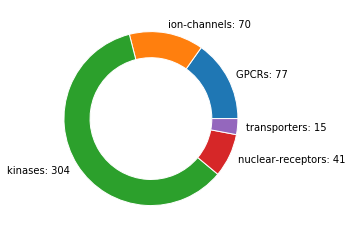

In [11]:
width=0.3
labels = ["{}: {}".format(f, n) for f, n in zip(pdbs_per_class.keys(), pdbs_per_class.values())]
plt.pie(pdbs_per_class.values(), labels=labels, radius=1,
        wedgeprops=dict(width=width, edgecolor='w'))

plt.show()